## O Dataset e o Projeto
<hr>

### Fonte: https://www.kaggle.com/greenwing1985/housepricing

### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Nosso objetivo neste exercício é criar um modelo de machine learning, utilizando a técnica de Regressão Linear, que faça previsões sobre os preços de imóveis a partir de um conjunto de características conhecidas dos imóveis.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Vamos utilizar um dataset disponível no Kaggle que foi gerado por computador para treinamento de machine learning para iniciantes. Este dataset foi modificado para facilitar o nosso objetivo, que é fixar o conhecimento adquirido no treinamento de Regressão Linear.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Siga os passos propostos nos comentários acima de cada célular e bons estudos.</p>

### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>precos</b> - Preços do imóveis</li>
    <li><b>area</b> - Área do imóvel</li>
    <li><b>garagem</b> - Número de vagas de garagem</li>
    <li><b>banheiros</b> - Número de banheiros</li>
    <li><b>lareira</b> - Número de lareiras</li>
    <li><b>marmore</b> - Se o imóvel possui acabamento em mármore branco (1) ou não (0)</li>
    <li><b>andares</b> - Se o imóvel possui mais de um andar (1) ou não (0)</li>
</ul>

#Importando os dados

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

casas = pd.read_csv('HousePrices_HalfMil.csv', sep=';')
casas.shape

(1000, 7)

In [6]:
casas.head()

,precos,area,garagem,banheiros,lareira,marmore,andares
0,51875,25,3,4,3,0,1
1,17875,35,1,3,1,0,0
2,47075,195,2,4,2,0,0
3,38575,33,2,2,1,0,1
4,33775,11,2,3,0,0,1


#Análises Preliminares

In [10]:
casas.describe().round()

,precos,area,garagem,banheiros,lareira,marmore,andares
count,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0
mean,41986.0,124.0,2.0,3.0,2.0,0.0,0.0
std,12140.0,72.0,1.0,1.0,1.0,0.0,1.0
min,13150.0,1.0,1.0,1.0,0.0,0.0,0.0
25%,33112.0,61.0,1.0,2.0,1.0,0.0,0.0
50%,41725.0,123.0,2.0,3.0,2.0,0.0,0.0
75%,51175.0,187.0,3.0,4.0,3.0,1.0,1.0
max,73675.0,249.0,3.0,5.0,4.0,1.0,1.0


##Matriz de Correlação

In [13]:
casas.corr().round(4)

,precos,area,garagem,banheiros,lareira,marmore,andares
precos,1.0000,0.1177,0.1028,0.1244,0.1072,0.4308,0.6315
area,0.1177,1.0000,-0.0075,-0.0114,0.0121,-0.0153,-0.0180
garagem,0.1028,-0.0075,1.0000,0.0671,0.0605,-0.0156,-0.0206
banheiros,0.1244,-0.0114,0.0671,1.0000,0.0484,-0.0253,-0.0182
lareira,0.1072,0.0121,0.0605,0.0484,1.0000,0.0296,-0.0035
marmore,0.4308,-0.0153,-0.0156,-0.0253,0.0296,1.0000,-0.0065
andares,0.6315,-0.0180,-0.0206,-0.0182,-0.0035,-0.0065,1.0000


##Análise Visual

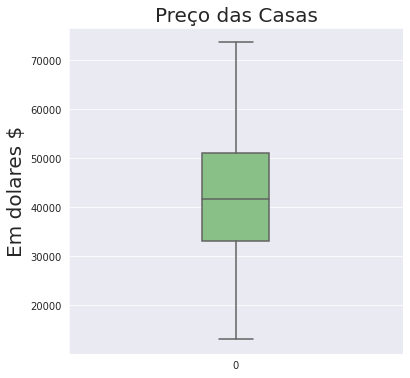

In [93]:
import seaborn as sns
sns.set_palette('Accent')
sns.set_style('darkgrid')

ax = sns.boxplot(data =casas.precos, orient='v', width=0.2)
ax.figure.set_size_inches(6,6)
ax.set_title('Preço das Casas', fontsize=20)
ax.set_ylabel('Em dolares $', fontsize=20)
ax

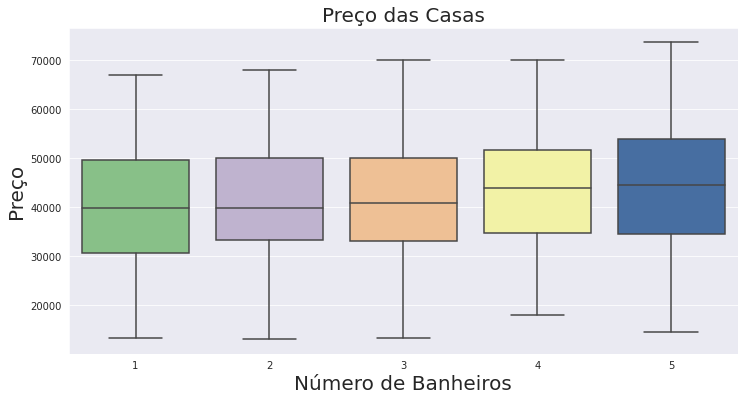

In [133]:
ax = sns.boxplot(x='banheiros',y='precos', data=casas)
ax.figure.set_size_inches(12,6)
ax.set_title('Preço das Casas', fontsize=20)
ax.set_ylabel('Preço', fontsize=20)
ax.set_xlabel('Número de Banheiros',fontsize=20)
ax

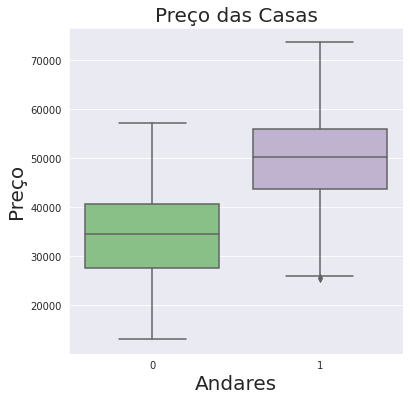

In [134]:
ax = sns.boxplot(x='andares',y='precos', data=casas)
ax.figure.set_size_inches(6,6)
ax.set_title('Preço das Casas', fontsize=20)
ax.set_ylabel('Preço', fontsize=20)
ax.set_xlabel('Andares',fontsize=20)
ax

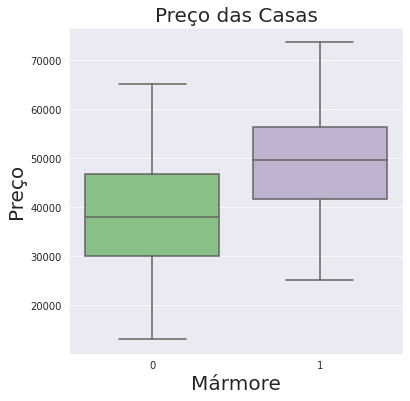

In [135]:
ax = sns.boxplot(x='marmore',y='precos', data=casas)
ax.figure.set_size_inches(6,6)
ax.set_title('Preço das Casas', fontsize=20)
ax.set_ylabel('Preço', fontsize=20)
ax.set_xlabel('Mármore',fontsize=20)
ax

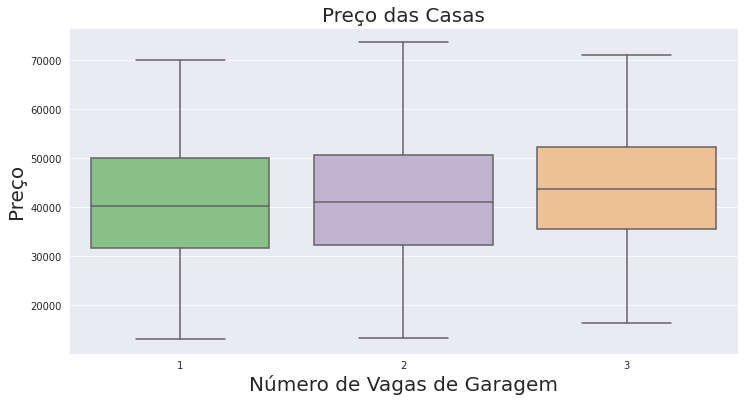

In [136]:
ax = sns.boxplot(x='garagem',y='precos', data=casas)
ax.figure.set_size_inches(12,6)
ax.set_title('Preço das Casas', fontsize=20)
ax.set_ylabel('Preço', fontsize=20)
ax.set_xlabel('Número de Vagas de Garagem',fontsize=20)
ax

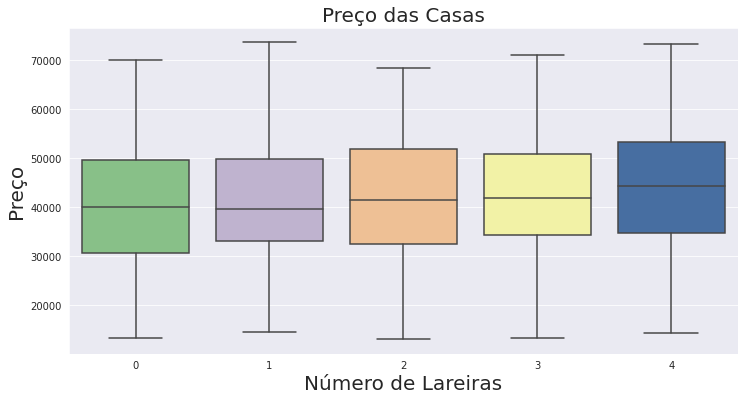

In [137]:
ax = sns.boxplot(x='lareira',y='precos', data=casas)
ax.figure.set_size_inches(12,6)
ax.set_title('Preço das Casas', fontsize=20)
ax.set_ylabel('Preço', fontsize=20)
ax.set_xlabel('Número de Lareiras',fontsize=20)
ax

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


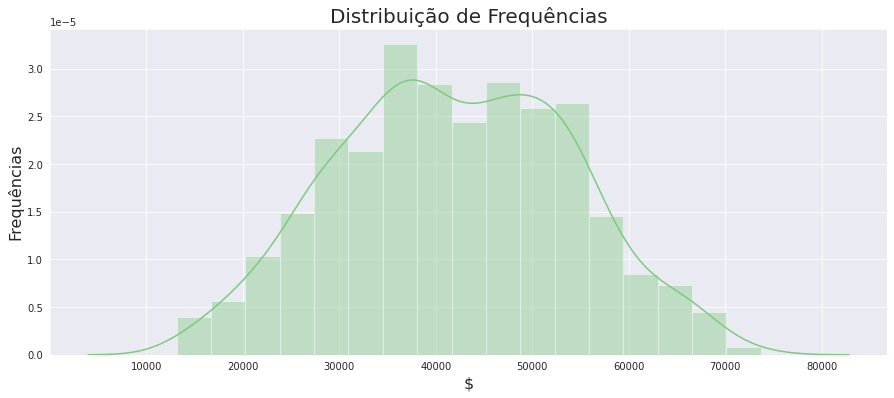

In [142]:
ax = sns.distplot(casas.precos)
ax.figure.set_size_inches(15,6)
ax.set_title('Distribuição de Frequências',fontsize=20)
ax.set_ylabel('Frequências',fontsize=16)
ax.set_xlabel('$',fontsize=16)
ax

#Análise de Correlação entre as variáveis

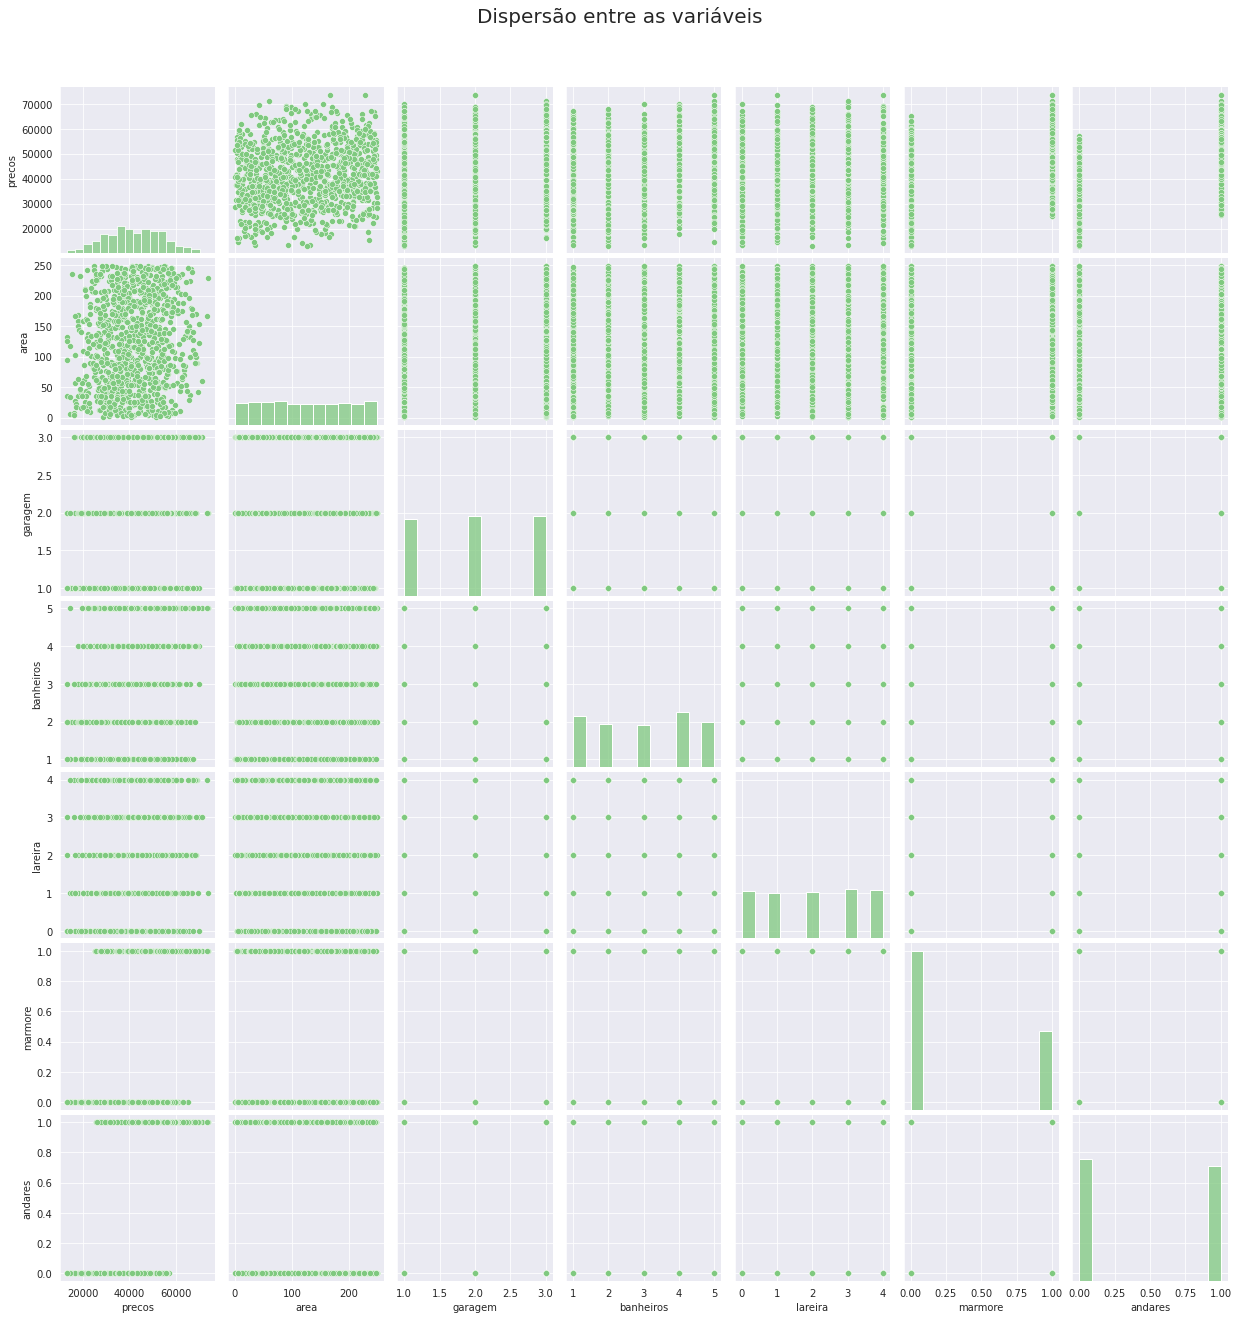

In [144]:
ax = sns.pairplot(casas)
ax.fig.suptitle('Dispersão entre as variáveis',fontsize=20,y=1.05)
ax

Text(0.5, 1.15, 'Dispersão entre as variáveis e Reta de Regressão')

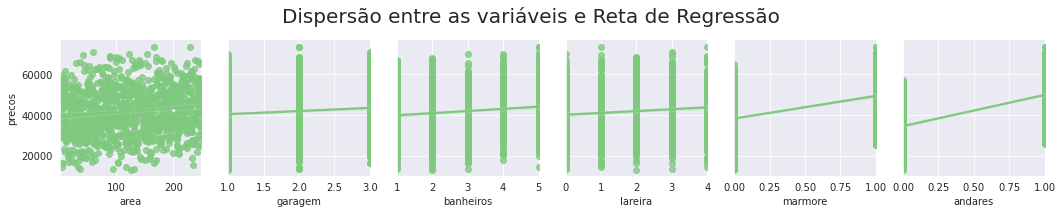

In [56]:
ax = sns.pairplot(casas,y_vars='precos',x_vars=['area','garagem','banheiros','lareira','marmore','andares'],kind='reg')
ax.fig.suptitle('Dispersão entre as variáveis e Reta de Regressão',fontsize=20,y=1.15)

#Estimando o modelo de regressão para o preço

In [107]:
from sklearn.model_selection import train_test_split

y = casas.precos
X= casas[['area','garagem','banheiros','lareira','marmore','andares']]

X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=10)

In [108]:
X_train.shape

(700, 6)

In [109]:
X_test.shape

(300, 6)

In [110]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

modelo = LinearRegression()
modelo.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

##Coeficiente de Determinação R²

In [111]:
print('R² = {}'.format(modelo.score(X_train,y_train).round(2)))

R² = 0.65


##Obtendo Previsões

In [112]:
y_previsto = modelo.predict(X_test)
print('R² = %s'% metrics.r2_score(y_test,y_previsto).round(2))

R² = 0.63


##Previsões Pontuais

In [113]:
entrada = X_test[0:1]
entrada

,area,garagem,banheiros,lareira,marmore,andares
841,203,3,3,4,0,0


In [114]:
modelo.predict(entrada)[0]

35033.03607917859

##Simulador Simples

In [116]:
area = 25
garagem = 1
banheiros = 2
lareira = 1
marmore = 1
andares = 1
entrada = [[area,garagem,banheiros,lareira,marmore,andares]]

print('${0:.2f}'.format(modelo.predict(entrada)[0]))

$51727.05


##Coeficientes do Modelos

In [117]:
index = ['Intercepto','Area','Garagem','Banheiros','Lareira','Marmore','Andares']
pd.DataFrame(data=np.append(modelo.intercept_,modelo.coef_),index = index, columns=['Parâmetros'])

,Parâmetros
Intercepto,19996.552273
Area,19.919289
Garagem,1569.937418
Banheiros,1146.564061
Lareira,710.840948
Marmore,10465.454698
Andares,16193.153347


#Análise Gráfica das Previsões do Modelo

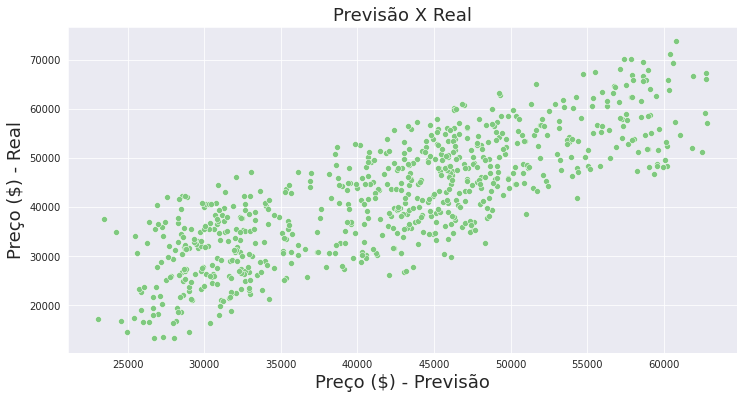

In [118]:
y_previsto_train = modelo.predict(X_train)

ax = sns.scatterplot(x=y_previsto_train, y=y_train)
ax.figure.set_size_inches(12,6)
ax.set_title('Previsão X Real',fontsize=18)
ax.set_xlabel('Preço ($) - Previsão',fontsize=18)
ax.set_ylabel('Preço ($) - Real',fontsize=18)
ax

##Resíduo

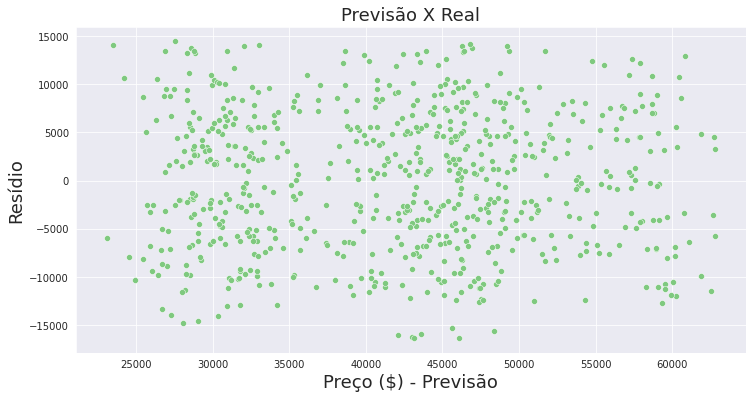

In [119]:
residuo = y_train - y_previsto_train
ax = sns.scatterplot(x=y_previsto_train, y=residuo)
ax.figure.set_size_inches(12,6)
ax.set_title('Previsão X Real',fontsize=18)
ax.set_xlabel('Preço ($) - Previsão',fontsize=18)
ax.set_ylabel('Resídio',fontsize=18)
ax

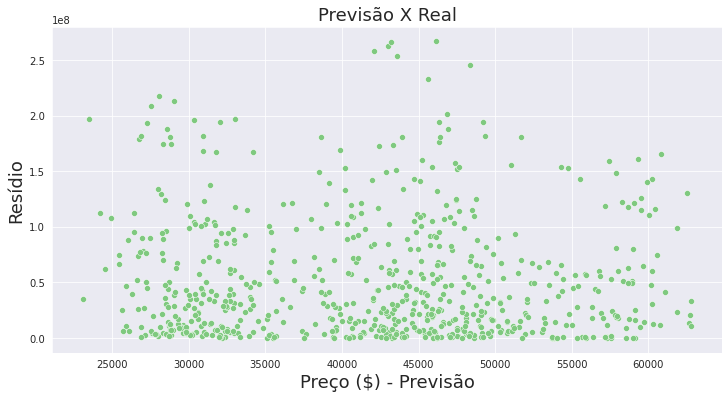

In [120]:
residuo = y_train - y_previsto_train
ax = sns.scatterplot(x=y_previsto_train, y=residuo**2)
ax.figure.set_size_inches(12,6)
ax.set_title('Previsão X Real',fontsize=18)
ax.set_xlabel('Preço ($) - Previsão',fontsize=18)
ax.set_ylabel('Resídio',fontsize=18)
ax

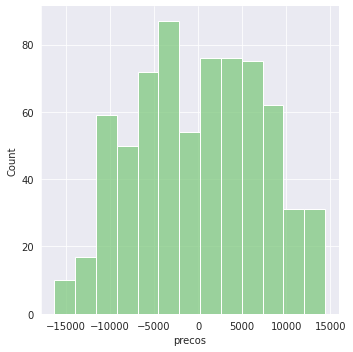

In [121]:
ax = sns.displot(residuo)


#Comparando Modelos

In [122]:
y2 = casas.precos
X2= casas[['marmore','andares']]

X2_train, X2_test,y2_train,y2_test = train_test_split(X2,y2, test_size=0.3,random_state=10)
modelo_2 = LinearRegression()
modelo_2.fit(X2_train,y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [123]:
print('Modelo com Andares e Mármore')
print('R² = {}'.format(modelo_2.score(X2_train,y2_train).round(2)))

Modelo com Andares e Mármore
R² = 0.6


In [124]:
print('Modelo com todas as variáveis')
print('R² = {}'.format(modelo.score(X_train,y_train).round(2)))

Modelo com todas as variáveis
R² = 0.65


In [125]:
y_previsto = modelo.predict(X_test)
y_previsto_2 = modelo_2.predict(X2_test)

In [126]:
print('Modelo com Armário e Mármore')
print('R² = {}'.format(metrics.r2_score(y2_test,y_previsto_2).round(2)))

Modelo com Armário e Mármore
R² = 0.57


In [127]:
print('Modelo com todas as variáveis')
print('R² = {}'.format(metrics.r2_score(y_test,y_previsto).round(2)))

Modelo com todas as variáveis
R² = 0.63


#Erro Quadrático Médio (EQM) e sqrt(EQM)

## Armário e Mármore

In [128]:
EQM_2 = metrics.mean_squared_error(y2_test,y_previsto_2).round(2)
REQM_2 = np.sqrt(metrics.mean_squared_error(y2_test,y_previsto_2)).round(2)
R2_2 = metrics.r2_score(y2_test,y_previsto_2).round(2)

pd.DataFrame([EQM_2,REQM_2,R2_2],['EQM','REQM','R²'],columns=['Métricas'])

,Métricas
EQM,65664396.81
REQM,8103.36
R²,0.57


##Todas as Variáveis

In [129]:
EQM = metrics.mean_squared_error(y_test,y_previsto).round(2)
REQM = np.sqrt(metrics.mean_squared_error(y_test,y_previsto)).round(2)
R2 = metrics.r2_score(y_test,y_previsto).round(2)

pd.DataFrame([EQM,REQM,R2],['EQM','REQM','R²'],columns=['Métricas'])

,Métricas
EQM,55248653.79
REQM,7432.94
R²,0.63


#Simulador

In [131]:
from ipywidgets import widgets,HBox,VBox
from IPython.display import display

area = widgets.Text(description='Área')
garagem = widgets.Text(description='Garagem')
banheiros = widgets.Text(description='Banheiros')
lareira = widgets.Text(description='Lareira')
marmore = widgets.Text(description='Mármore?')
andares = widgets.Text(description='Andares?')

botao = widgets.Button(description='Simular')

left = VBox([area,garagem,banheiros])
right = VBox([lareira,marmore,andares])
inputs = HBox([left,right])

def simulador(sender):
  entrada=[[
            float(area.value if area.value else 0),
            float(garagem.value if garagem.value else 0),
            float(banheiros.value if banheiros.value else 0),
            float(lareira.value if lareira.value else 0),
            float(marmore.value if marmore.value else 0),
            float(andares.value if andares.value else 0)
  ]]
  print('$ {0:.2f}'.format(modelo.predict(entrada)[0]))

botao.on_click(simulador)

In [148]:
display(inputs,botao)

Button(description='Simular', style=ButtonStyle())

#Salvando o modelo

In [147]:
import pickle

output = open('modelo_preco_casa','wb')
pickle.dump(modelo,output)
output.close()

### Em um novo notebook/projeto Python

<h4 style='color: blue; font-weight: normal'>In [1]:</h4>

```sh
import pickle

modelo = open('modelo_preço_casa','rb')
lm_new = pickle.load(modelo)
modelo.close()

area = 38
garagem = 2
banheiros = 4
lareira = 4
marmore = 0
andares = 1

entrada = [[area, garagem, banheiros, lareira, marmore, andares]]

print('$ {0:.2f}'.format(lm_new.predict(entrada)[0]))
```

<h4 style='color: red; font-weight: normal'>Out [1]:</h4>

```
$ 46389.80
```